In [1]:
import sympy
sympy.init_printing()
import numpy as np
import ipyvolume as ipv
import ipyvolume.pylab as plt3d

## General Forms

### Hessian Matrix

In [60]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="LbBcuZukCAw", width=600, height=400)

In [28]:
x, y, z= sympy.symbols("x, y, z")
f = sympy.Function("f")(x, y, z)
f_hessian = [[f.diff(x_, y_) for x_ in (x, y, z)] for y_ in (x, y, z)]
H = sympy.Matrix(f_hessian)
H

⎡   2                  2                  2             ⎤
⎢  ∂                  ∂                  ∂              ⎥
⎢ ───(f(x, y, z))   ─────(f(x, y, z))  ─────(f(x, y, z))⎥
⎢   2               ∂y ∂x              ∂z ∂x            ⎥
⎢ ∂x                                                    ⎥
⎢                                                       ⎥
⎢   2                  2                  2             ⎥
⎢  ∂                  ∂                  ∂              ⎥
⎢─────(f(x, y, z))   ───(f(x, y, z))   ─────(f(x, y, z))⎥
⎢∂y ∂x                 2               ∂z ∂y            ⎥
⎢                    ∂y                                 ⎥
⎢                                                       ⎥
⎢   2                  2                  2             ⎥
⎢  ∂                  ∂                  ∂              ⎥
⎢─────(f(x, y, z))  ─────(f(x, y, z))   ───(f(x, y, z)) ⎥
⎢∂z ∂x              ∂z ∂y                 2             ⎥
⎣                                       ∂z              ⎦

### Expressing a quadratic form with a matrix

In [59]:
YouTubeVideo(id="0yEiCV-xEWQ", width=600, height=400)

In [3]:
a, b, c, d, e, f= sympy.symbols("a, b, c, d, e, f")
v = sympy.Matrix([x, y, z])
m = sympy.Matrix([[a, b, c], [b, d, e], [c, e, f]])
sympy.expand(v.T * m * v)

⎡   2                          2                2⎤
⎣a⋅x  + 2⋅b⋅x⋅y + 2⋅c⋅x⋅z + d⋅y  + 2⋅e⋅y⋅z + f⋅z ⎦

### Vector form of multivariable quadratic approximation

In [58]:
YouTubeVideo(id="ClFrIg0PpnM", width=600, height=400)

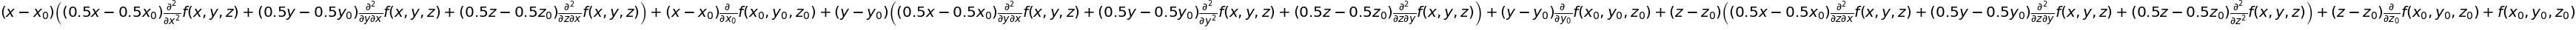

In [57]:
x0, y0, z0 = sympy.symbols("x0, y0, z0")
v = sympy.Matrix([x - x0, y - y0, z - z0])
f_grad = sympy.Matrix([f.diff(x), f.diff(y), f.diff(z)])

f0 = sympy.Function("f")(x0, y0, z0)
f_grad0 = f_grad.subs({"x":x0, "y":y0, "z":z0})
H0 = H.subs({"x":x0, "y":y0, "z":z0})
Q = f0 + (v.T * f_grad0)[0] + (1/2 * v.T * H * v)[0]
Q

## Example
### $f(x,y)=e^{\frac x 2}siny$

In [61]:
YouTubeVideo(id="fW3snxnCPEY", width=600, height=400)

In [4]:
x0, y0, z0 = [np.array([0.0]), np.array([np.pi/2]), np.array([1.0])]

X = np.arange(-6, 6, 0.1)  
Y = np.arange(-6, 6, 0.1)  
X, Y = np.meshgrid(X, Y) 
Z = np.exp(X/2) * np.sin(Y)
Q = 1 + X/2 + X**2/8 - (Y - np.pi/2)**2 / 2

plt3d.figure(screen_capture_enabled=True)
plt3d.plot_surface(X, Z, Y, color="green")
plt3d.plot_surface(X, Q, Y, color="red")
plt3d.scatter(x0, z0, y0, size=8, marker="sphere", color="blue")

plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

In [68]:
x, y = sympy.symbols("x, y")
f = sympy.exp(x/2) * sympy.sin(y)
f_grad = sympy.Matrix([f.diff(x), f.diff(y)])
f_grad

⎡ x       ⎤
⎢ ─       ⎥
⎢ 2       ⎥
⎢ℯ ⋅sin(y)⎥
⎢─────────⎥
⎢    2    ⎥
⎢         ⎥
⎢ x       ⎥
⎢ ─       ⎥
⎢ 2       ⎥
⎣ℯ ⋅cos(y)⎦

In [69]:
f_hessian = [[f.diff(x_, y_) for x_ in (x, y)] for y_ in (x, y)]
hessian = sympy.Matrix(f_hessian)
hessian

⎡ x          x        ⎤
⎢ ─          ─        ⎥
⎢ 2          2        ⎥
⎢ℯ ⋅sin(y)  ℯ ⋅cos(y) ⎥
⎢─────────  ───────── ⎥
⎢    4          2     ⎥
⎢                     ⎥
⎢ x                   ⎥
⎢ ─           x       ⎥
⎢ 2           ─       ⎥
⎢ℯ ⋅cos(y)    2       ⎥
⎢─────────  -ℯ ⋅sin(y)⎥
⎣    2                ⎦

In [72]:
f0 = f.subs({"x":0, "y":sympy.pi / 2})
f_grad0 = f_grad.subs({"x":0, "y":sympy.pi / 2})
H0 = hessian.subs({"x":0, "y":sympy.pi / 2})

In [75]:
Q = f0 + (v.T * f_grad0)[0] + (1/2 * v.T * H0 * v)[0]
sympy.simplify(Q)